# Intro to Linear Regression

- Simple linear regression
- multiple linear regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import sqrt
%matplotlib inline

## Import data

In [2]:
diabetes = datasets.load_diabetes()

Data source:
http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf


In [3]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [4]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


recoding sex variable

In [5]:
diabetes_df['sex'].value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [6]:
diabetes_df['sex'] = np.where(diabetes_df['sex'] > 0, 1,0)

In [7]:
diabetes_df['sex'].value_counts()

0    235
1    207
Name: sex, dtype: int64

In [8]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,0.468326,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,0.499561,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,0.000000,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,0.000000,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,0.000000,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,1.000000,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,1.000000,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [11]:
y = pd.DataFrame(data=diabetes.target, columns=['disease'])

In [12]:
y.describe()

,disease
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


## Initial exploration

Plotting our Label against BMI, can you see a linear relationship?

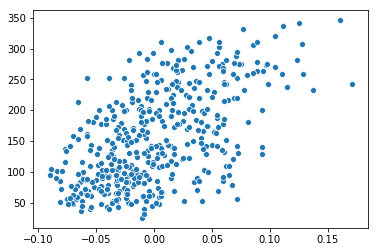

In [14]:
sns.scatterplot(x=diabetes_df['bmi'].values, y=y.values.ravel(), );

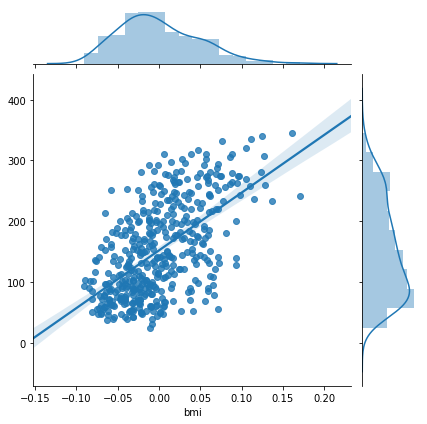

In [15]:
sns.jointplot(x=diabetes_df['bmi'], y=y.values.ravel(), kind='reg');

## Preparing our data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(353, 10)

In [18]:
X_test.shape

(89, 10)

In [29]:
from sklearn.linear_model import LinearRegression

array([ 0.01211685, -0.01806189,  0.04984027, -0.03530688, -0.06548562,
       -0.03961813,  0.02073935,  0.06924089,  0.03798434, -0.01698407,
       -0.06871905,  0.01966154, -0.05794093,  0.10480869, -0.07949718,
        0.02073935, -0.04069594, -0.03530688, -0.04392938,  0.01966154,
        0.02612841, -0.03638469,  0.04229559, -0.05039625,  0.05522933,
        0.01427248, -0.01159501, -0.0105172 , -0.00943939, -0.00405033,
        0.01535029,  0.02397278, -0.0374625 , -0.03207344,  0.01858372,
       -0.01590626, -0.00620595,  0.00888341, -0.0374625 , -0.00943939,
       -0.07734155, -0.00189471, -0.04500719,  0.04552903,  0.03259528,
        0.08540807, -0.0105172 ,  0.11019775, -0.00620595,  0.00133873,
        0.114509  , -0.04069594,  0.01750591,  0.05954058, -0.046085  ,
        0.04768465,  0.00564998, -0.03099563,  0.05415152, -0.00512814,
       -0.00943939,  0.0250506 ,  0.12852056,  0.01427248, -0.00081689,
       -0.03099563,  0.00457217,  0.00996123, -0.03099563, -0.03

In [45]:
lr = LinearRegression()
lr.fit(X_train['bmi'].values.reshape(-1,1), y_train)
print('Coeficients')
print(lr.coef_)
print('Intercept')
print(lr.intercept_)

Coeficients
[[998.57768914]]
Intercept
[152.00335421]


## Simple linear regression with Statsmodels
- Recomended linear regression api due to useful summary output

In [46]:
!pip install statsmodels

In [47]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [58]:
X = sm.add_constant(X_train['bmi'])
simple_model = sm.OLS(y_train, X)

simple_result = simple_model.fit();

In [59]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           1.40e-36
Time:                        11:48:47   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.0034      3.316     45.841      0.0

In [61]:
X_test['bmi']

287   -0.006206
211    0.036907
72    -0.004050
321    0.051996
73    -0.020218
         ...   
255   -0.065486
90    -0.025607
57    -0.063330
391   -0.069797
24     0.035829
Name: bmi, Length: 89, dtype: float64

In [62]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test['bmi']))

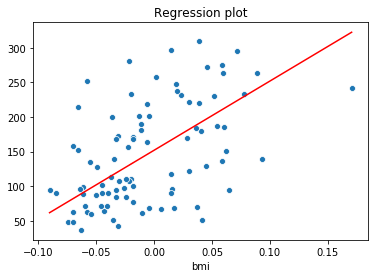

In [80]:
sns.scatterplot(x = X_test['bmi'], y = y_test.values.ravel())
sns.lineplot(x = X_test['bmi'] , y = y_pred_simple, color='r')
plt.title('Regression plot');

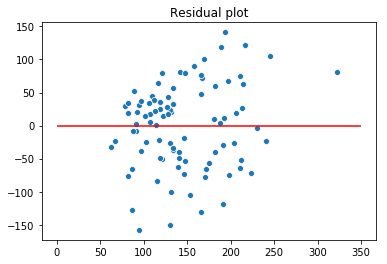

In [72]:
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple- y_test.values.ravel()))
plt.hlines(y=0, xmin=0, xmax=350,color='r')
plt.title('Residual plot');

## Multiple linear regression

In [75]:
multiple_model = sm.OLS(y_train, sm.add_constant(X_train))
multiple_result = multiple_model.fit()
print(multiple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           5.41e-50
Time:                        11:55:31   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.1474      4.208     38.530      0.0